In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
row_data=pd.read_csv("D:\\Complete Data Science Bootcamp Udemy\\The Data Science Course 2018 - All Resources\\part_5_advanced_statistical_methods_(machine_learning)\\S36_L236\\2.01. Admittance.csv")

In [4]:
row_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [6]:
data=row_data.copy()
data["Admitted"]=data["Admitted"].map({"Yes":1,"No":0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


In [7]:
y=data["Admitted"]
x1=data["SAT"]

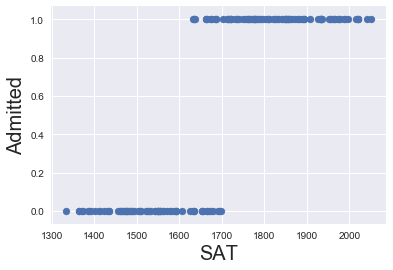

In [10]:
plt.scatter(x1,y)
plt.xlabel("SAT",fontsize=20)
plt.ylabel("Admitted",fontsize=20)
plt.show()

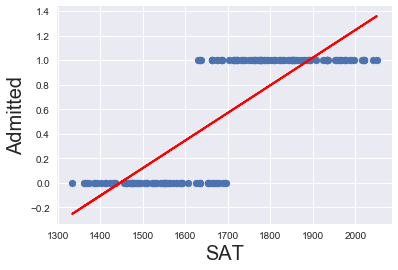

In [18]:
x=sm.add_constant(x1)
reg_lin=sm.OLS(y,x)
reg_result=reg_lin.fit()

plt.scatter(x1,y)
y_hat = x1*reg_result.params[1]+reg_result.params[0]
plt.plot(x1,y_hat,lw=2,color="red")
plt.xlabel("SAT",fontsize=20)
plt.ylabel("Admitted",fontsize=20)
plt.show()

In [19]:
reg_log=sm.Logit(y,x)
reg_result=reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


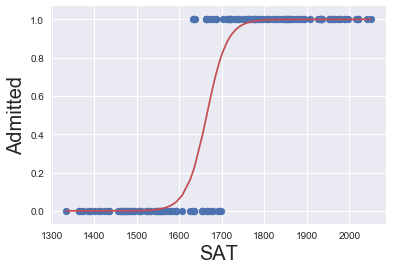

In [21]:
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,reg_result.params[0],reg_result.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()